Выполнил: Seriy Nikita

## Шаг 1. Подготовка данных

### 1.1 Загрузка и очистка данных:
- [**+**] Загрузка датасета
- [**+**] Обработка выбросов
- [**+**] Обработка дубликатов

---

### 1.2 Обработка отсутствующих значений: 
- [**+**] Проверим количество пропусков в каждом признаке
- [**+**] Удаление строк с пропусками
---
- [-] Удаление столбцов с пропусками
- [-] Удаляем строки с NaN значениями в столбце
- [-] Удаляем столбцы
- [-] Заполнение пропусков средним значением
- [-] Заполнение медианой
- [-] Заполнение модой
- [-] Заполнение специальным значением
- [-] Заполнение *методом $k$-ближайших соседей*\*.
  - [ ] Сделаны пояснения и выводы
---


### Загрузка данных

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, TargetEncoder

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.head())
print(df_train.info())

  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  EmploymentStatus  EducationLev

### Обработка исходных колонок

- Заметим, что следующие категориальные столбцы имеют тип необрабатываемый тип object, который преобразуем с помощью one-hot encoding. 
- При этом колонку ApplicationDate можно удалить для получения более точного значения MSE (выявлено эмпирически).

| № | Column              | Non-null  | Count   | Dtype   |
|-------|----------------------|----------------|---------|--------|
| 0     | ApplicationDate       | 10487          | non-null| object |
| 6     | MaritalStatus         | 10487          | non-null| object |
| 8     | HomeOwnershipStatus   | 10487          | non-null| object |
| 15    | LoanPurpose           | 9986           | non-null| object |
| 26    | EmploymentStatus      | 10487          | non-null| object |
| 27    | EducationLevel        | 10487          | non-null| object |


In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Удалим колонку ApplicationDate
df_train = df_train.drop(columns=['ApplicationDate'])


categorical_columns = [
    'MaritalStatus', 
    'HomeOwnershipStatus', 
    'LoanPurpose', 
    'EmploymentStatus', 
    'EducationLevel'
]
# One-Hot Encoding для категориальных признаков
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

# Удаление дубликатов и всех строк с пропусками
df_train = df_train.dropna().drop_duplicates(keep='first')
df_test = df_test.dropna().drop_duplicates(keep='first')


print(df_train.info())
print(df_train.isnull().sum())  # смотрим на пропуски

<class 'pandas.core.frame.DataFrame'>
Index: 9529 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9529 non-null   float64
 1   AnnualIncome                    9529 non-null   float64
 2   CreditScore                     9529 non-null   float64
 3   LoanAmount                      9529 non-null   float64
 4   LoanDuration                    9529 non-null   float64
 5   NumberOfDependents              9529 non-null   float64
 6   MonthlyDebtPayments             9529 non-null   float64
 7   CreditCardUtilizationRate       9529 non-null   float64
 8   NumberOfOpenCreditLines         9529 non-null   float64
 9   NumberOfCreditInquiries         9529 non-null   float64
 10  DebtToIncomeRatio               9529 non-null   float64
 11  BankruptcyHistory               9529 non-null   float64
 12  PreviousLoanDefaults            9529 no

## Визуализация распределения признаков: 
- [**+**] Визуализация матрицы корреляций с помощью тепловой карты
- [**+**] Рассмотрены признаки с сильной корреляцией (выше 0.7) 
- [**+**] Анализ зависимости
- [**+**] Выявление выбросов
  - [ ] Сделаны пояснения и выводы

## Анализ зависимости
- Построение матрицы сильно коррелирующих признаков позволит выявить мультиколлинеарность.
- Признаки с высокой корреляцией могут содержать дублирующую информацию, снижающую эффективность модели.

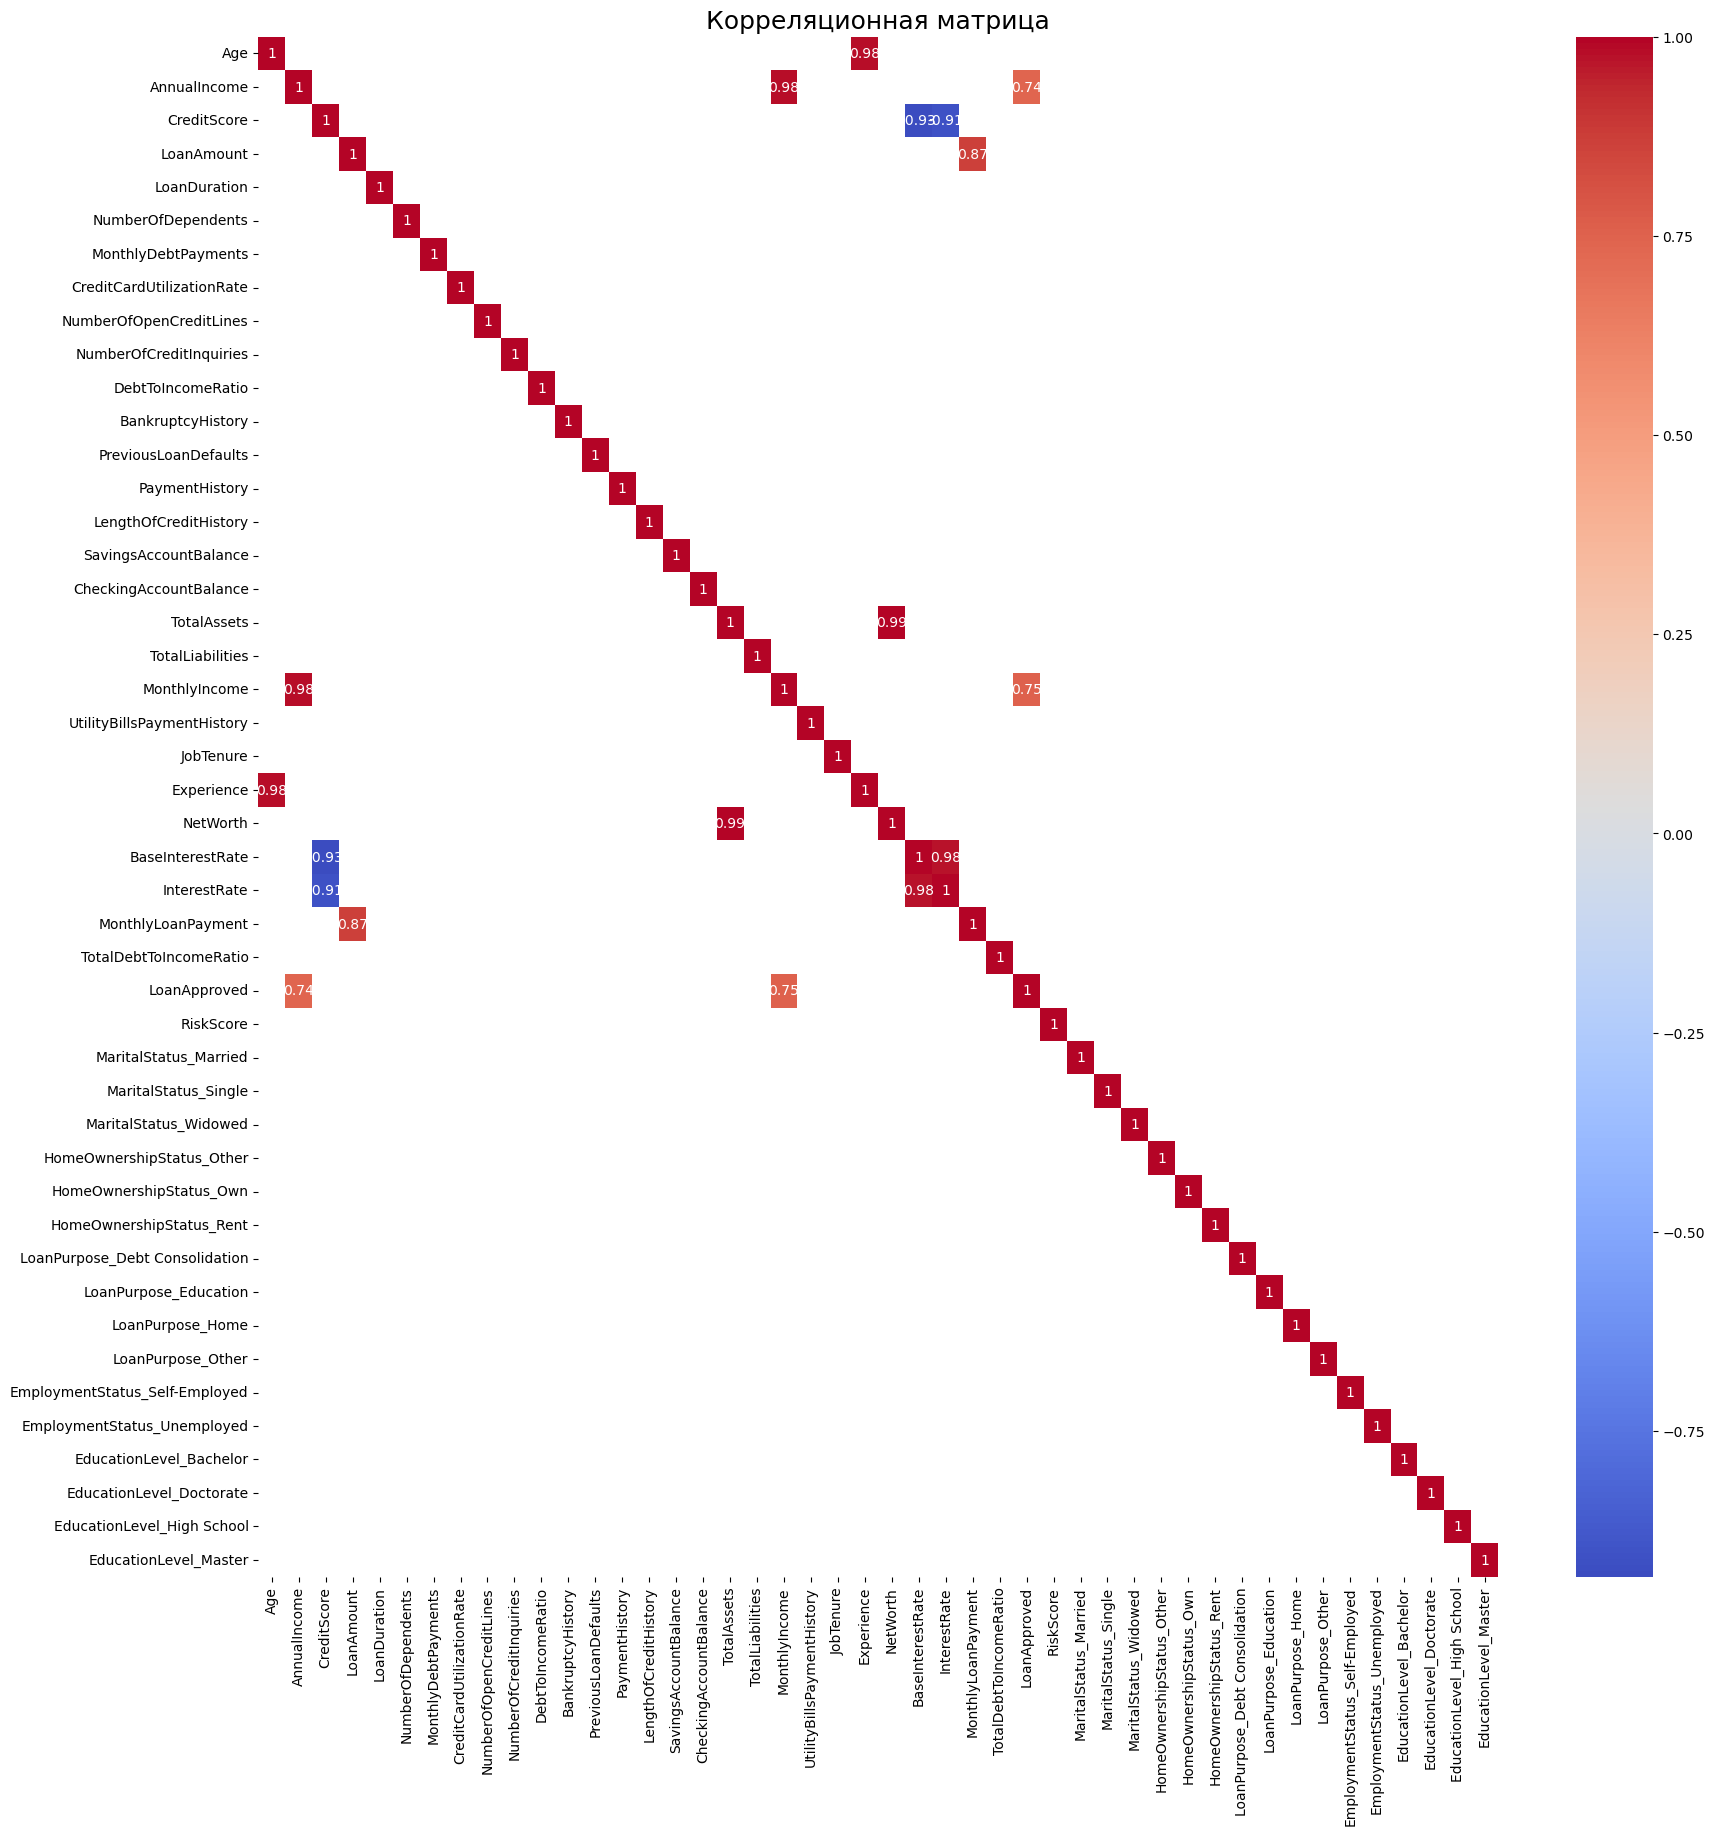

In [6]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix[correlation_matrix.abs() >= 0.7], annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица", fontsize=18)
plt.show()

In [7]:
# Вывод матрицы с сильной положительной корреляцией, убрав лишние NaN и пары для наглядности 
high_positive_correlation_matrix = correlation_matrix[(correlation_matrix.abs() >= 0.7) & (correlation_matrix != 1.0)].stack()
print(high_positive_correlation_matrix)


Age                 Experience            0.982835
AnnualIncome        MonthlyIncome         0.984377
                    LoanApproved          0.742279
CreditScore         BaseInterestRate     -0.932792
                    InterestRate         -0.909006
LoanAmount          MonthlyLoanPayment    0.868396
TotalAssets         NetWorth              0.993873
MonthlyIncome       AnnualIncome          0.984377
                    LoanApproved          0.754917
Experience          Age                   0.982835
NetWorth            TotalAssets           0.993873
BaseInterestRate    CreditScore          -0.932792
                    InterestRate          0.975232
InterestRate        CreditScore          -0.909006
                    BaseInterestRate      0.975232
MonthlyLoanPayment  LoanAmount            0.868396
LoanApproved        AnnualIncome          0.742279
                    MonthlyIncome         0.754917
dtype: float64


In [8]:
# Удалим признаки так, исключив линейные зависимости
# В случае зависимости категориальных признаков от некатегориальных будем стараться оставлять категориальные


df_train = df_train.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome',
        'InterestRate',
        'BaseInterestRate',
        'MonthlyLoanPayment',
        'TotalAssets'
    ],
    axis=1
)

df_test = df_test.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome',
        'InterestRate',
        'BaseInterestRate',
        'MonthlyLoanPayment',
        'TotalAssets'
    ],
    axis=1
)



## Поиск выбросов
- Чтобы повысить точность предсказания переменной RiskScore, построим для неё гистограмму и выявим выбросы.

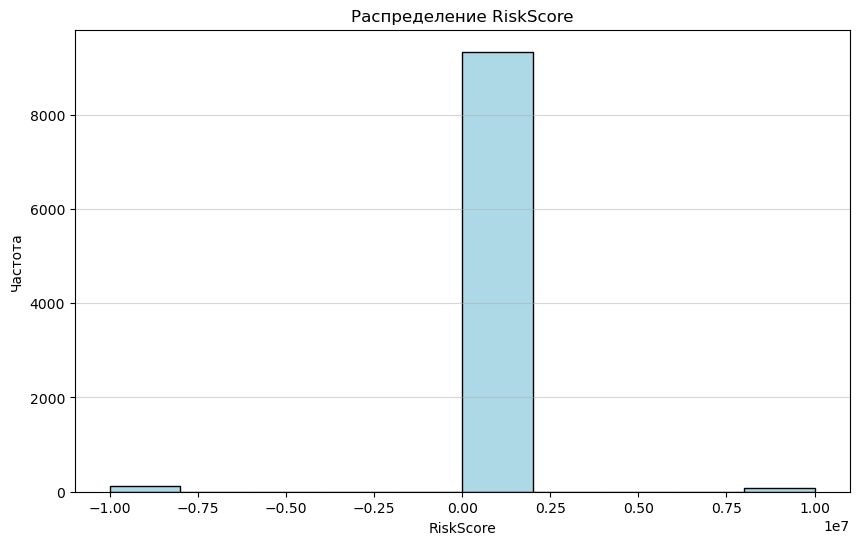

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=10, color='lightblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

## Удалим выбросы
- Сделаем это, оставив значения RiskScore в диапазоне (0-100)

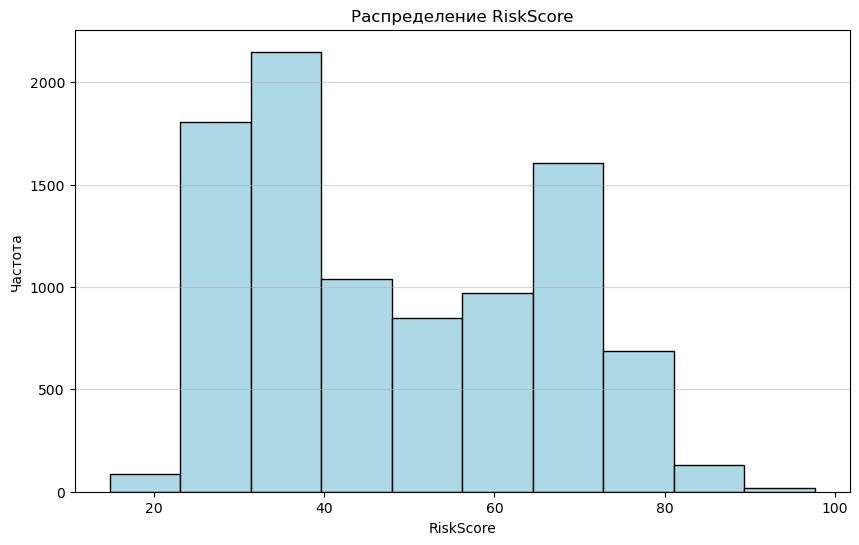

In [24]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=10, color='lightblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

## Масштабирование числовых признаков (нормализация данных): 
- [**+**] стандартизация ($z$-score)
- [**+**] min-max scaling
- [**+**] анализ корреляции, 
- [**-**] *анализ важности признаков*\*, 
- [**-**] *метод главных компонент (PCA)*\*.
- Если признаки имеют сильную корреляцию, то
  - [**+**] Удаление одного из признаков
  - [**+**] Комбинирование признаков
  - [-] Использование методов понижения размерностей
    - [**+**] Сделаны пояснения

## Комбинирование признаков
- Новые нелинейные признаки должны уменьшить линейную зависимость между исходными признаками и улучшить результаты модели.


In [25]:
df_train['Loan_per_ages'] = df_train['Age'] * df_train['LoanApproved']
df_test['Loan_per_ages'] = df_test['Age'] * df_test['LoanApproved']

df_train['NetWorth_within_age'] = df_train['Age'] * df_train['NetWorth']
df_test['NetWorth_within_age'] = df_test['Age'] * df_test['NetWorth']


## Разделение данных и оценка модели

  - [ ] Разделение на обучающую, тестовую и валидационную выборки.
  - [ ] Определение метрик: MSE, RMSE, MAE, ${R^2}$**\***.
  - [ ] Анализ ошибок.


In [26]:
# Разделение тренировочных данных на обучающую и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(
    df_train.drop(['RiskScore'], axis=1),
    df_train['RiskScore'],
    test_size=0.1,
    random_state=25
)

# Функция для обучения и тестирования модели
def train_and_test(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    model.fit(x_train, y_train)
    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)
    print(f'MSE train: {mean_squared_error(y_train, y_train_prediction)}')
    print(f'MSE test: {mean_squared_error(y_test, y_test_prediction)}')

## Обучение модели

  - [ ] Обучение модели линейной регрессии: бейзлайн (*можно попробовать применить собственноручно реализованную версию регрессии*\*)
  - [ ] Регуляризация: $L_1$ (Lasso), $L_2$ (Ridge), ElasticNet (Lasso + Ridge) для предотвращения переобучения.
  - [ ] Выбор оптимальной модели: сравнение обыкновенного МНК и регрессий с регуляризацией.
  - [ ] Настройка гиперпараметров: *кросс-валидация*\*, *поиск по сетке*\*...
    - [ ] Подбор модели и гиперпараметров, пояснить, что делали


In [27]:
# Обучение модели
model = LinearRegression()
train_and_test(model)

# Приведение тестовых данных к тем же признакам, что и в тренировочном наборе
x_test_final = df_test.reindex(columns=x_train.columns, fill_value=0)
y_test_pred_final = model.predict(x_test_final)

result = pd.DataFrame({
    'ID': df_test['ID'],
    'RiskScore': y_test_pred_final
})

result.to_csv('submission.csv', index=False)


MSE train: 19.925408412399936
MSE test: 19.766122126270957
